### Blob Detection
[link to example](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html#sphx-glr-auto-examples-features-detection-plot-blob-py)

Blobs are bright on dark or dark on bright regions in an image. In this example, blobs are detected using 3 algorithms. The image used in this case is the Hubble eXtreme Deep Field. Each bright dot in the image is a star or a galaxy.

#### Laplacian of Gaussian (LoG)
This is the most accurate and slowest approach.

It computes the Laplacian of Gaussian image with successively increasing standard deviation and stacks them in a cube. Blobs are local maximas in ths cube. Detecting larger blobs is especially slower because of larger kernel sizes during convalution, Only bright blobs on dark backgrounds are detected. See `skimage.feature.blob_log()` for usage.

#### Difference of Gaussian (DoG)
This is a faster approximation of LoG approach.

In this case the image is blurred with increasing standard deviations and the difference between two successively blurred images are stacked up in a cube. This method suffers from the same disadvantage as LoG approach for detection larger blobs. Blobs are again assumed to be bright on dark. See `skimage.feature.blob_dog()` for usage.

#### Determinant of Hessian (DoH)
This is the fastest approach.

It detects blobls by finding maximax in the matrix of the Determinant of Hessian of the image. The detection speed is independent of the size of blobs as internally the implementation uses box filters instead of convolutions. Bright on dark as well as dark on bright blobs are detected. The downside is that small blobs (<3px) are not detected accurately. See `skimage.feature.blob_doh()` for usage.

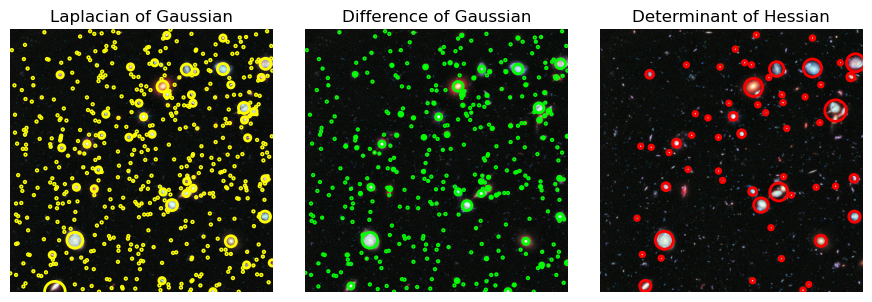

In [2]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
colors = ['yellow', 'lime', 'red']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()